### Grafik Analisis Bulanan Rata-Rata Tingkat Polusi PM 2.4 per stasiun di Kalimantan

##### Data diambil dari output hasil klasifikasi  file polusi_monthly kalimantan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the provided CSV file
csv_file_path = 'data/station_classification_monthly.csv'
data = pd.read_csv(csv_file_path)
data.head()

,date,stasiun,pm 2.5,Pollution Level,Pollution Level Description,Predicted Pollution Level,Predicted Pollution Level Description
0,2023-09,Balikpapan Sepinggan,57.750,1,Moderate,1,Moderate
1,2023-09,Balikpapan sepinggan,333.000,5,Hazardous,5,Hazardous
2,2023-09,Banjar Baru Landasan Ulin,161.875,3,Unhealthy,3,Unhealthy
3,2023-09,Banjarmasin Kayu Tangi,130.750,2,Unhealthy for Sensitive Groups,2,Unhealthy for Sensitive Groups
4,2023-09,Kabupaten Barito Selatan Sanggu,165.250,3,Unhealthy,3,Unhealthy


In [8]:
# Convert date to datetime format and extract the month
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data['month'] = data['date'].dt.strftime('%Y-%m')

# Get a list of unique stations
stations = data['stasiun'].unique()
print(stations)

['Balikpapan Sepinggan' 'Balikpapan sepinggan' 'Banjar Baru Landasan Ulin'
 'Banjarmasin Kayu Tangi' 'Kabupaten Barito Selatan Sanggu'
 'Kabupaten Kotawaringin Timur' 'Kabupaten Sanggau Kapuas'
 'Pontianak Tenggara Sungai Bangkong' 'Samarinda']


### Create a bar graph for each station

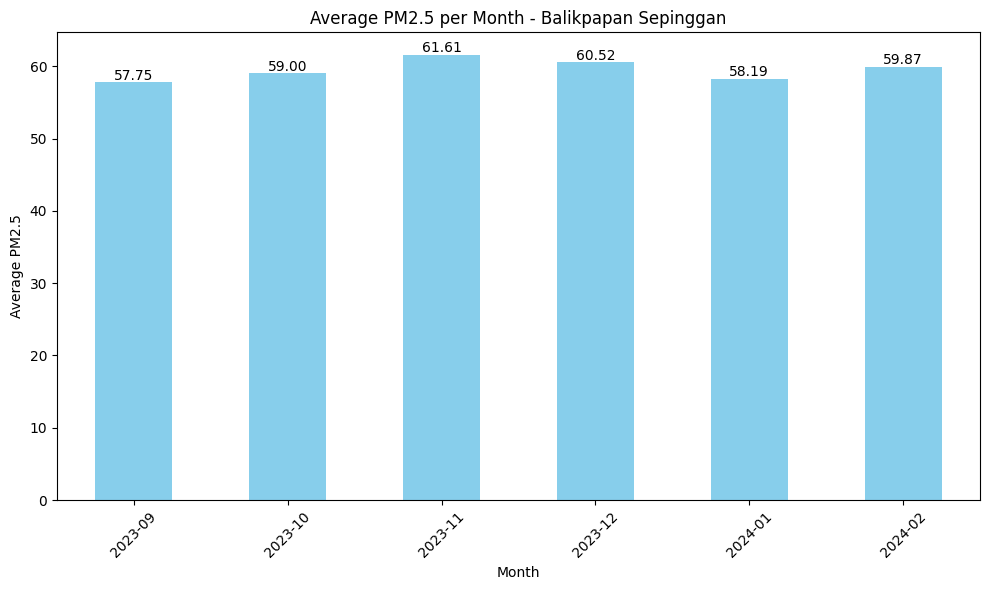

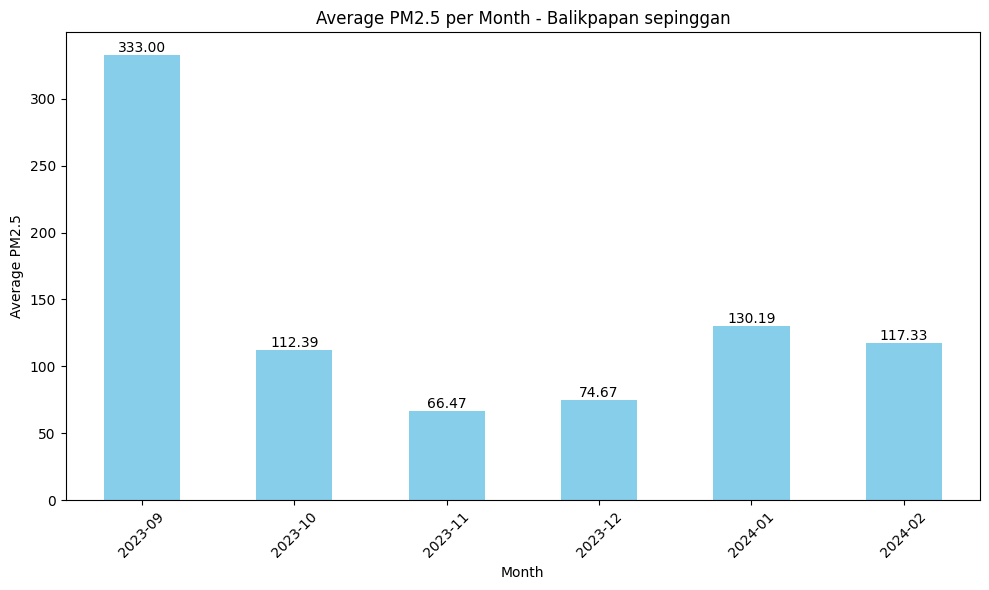

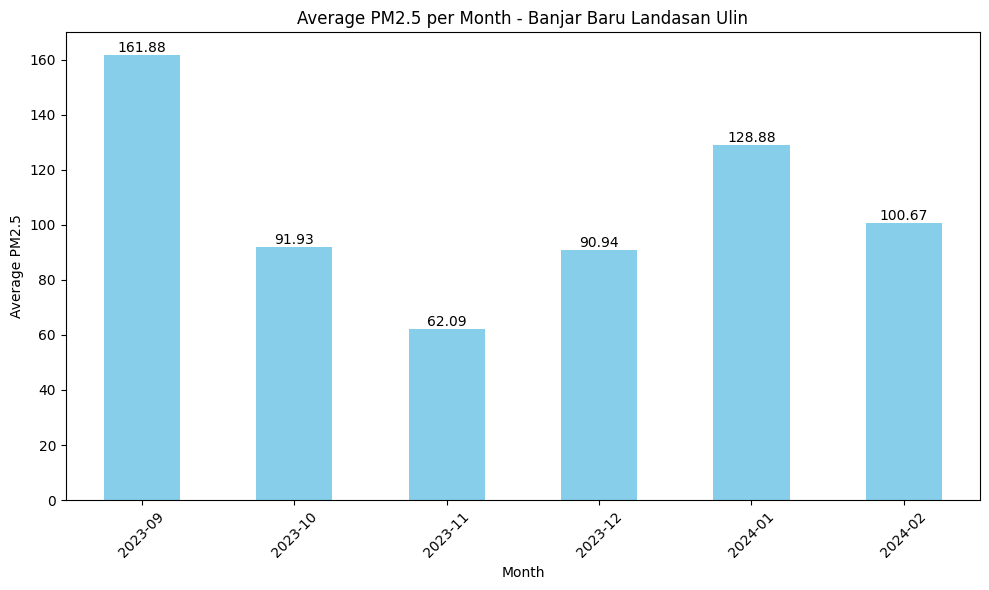

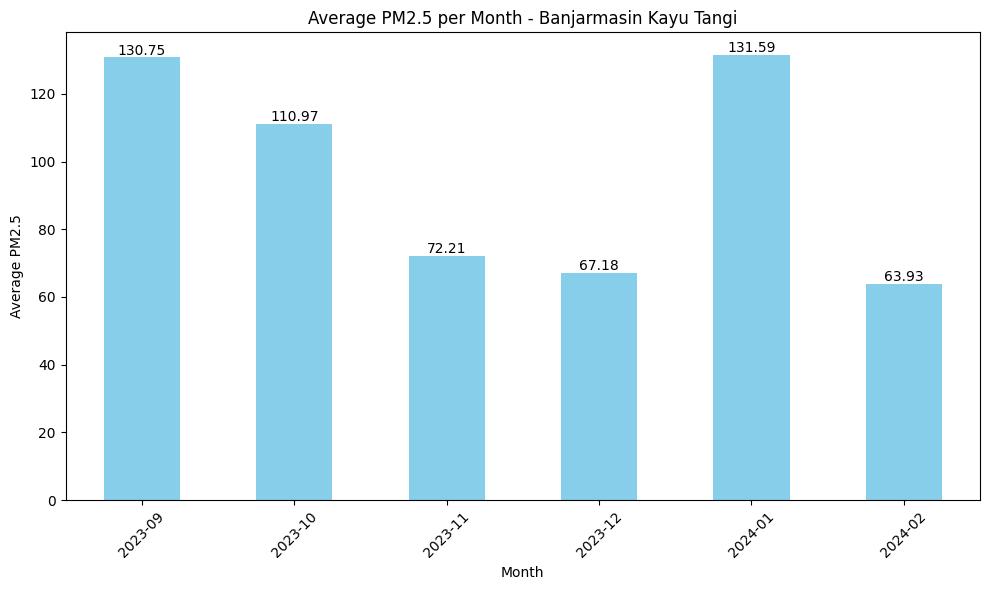

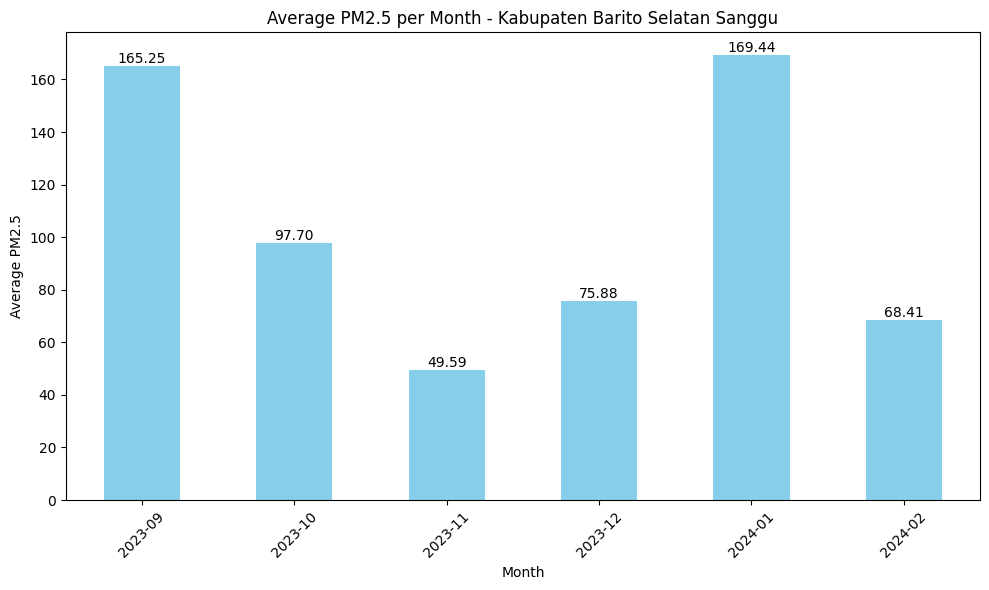

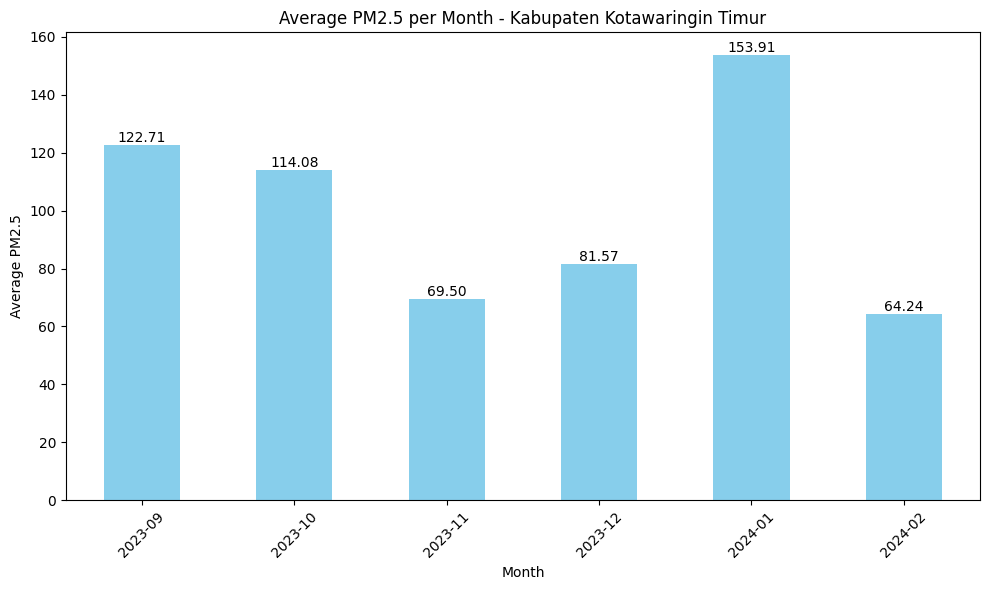

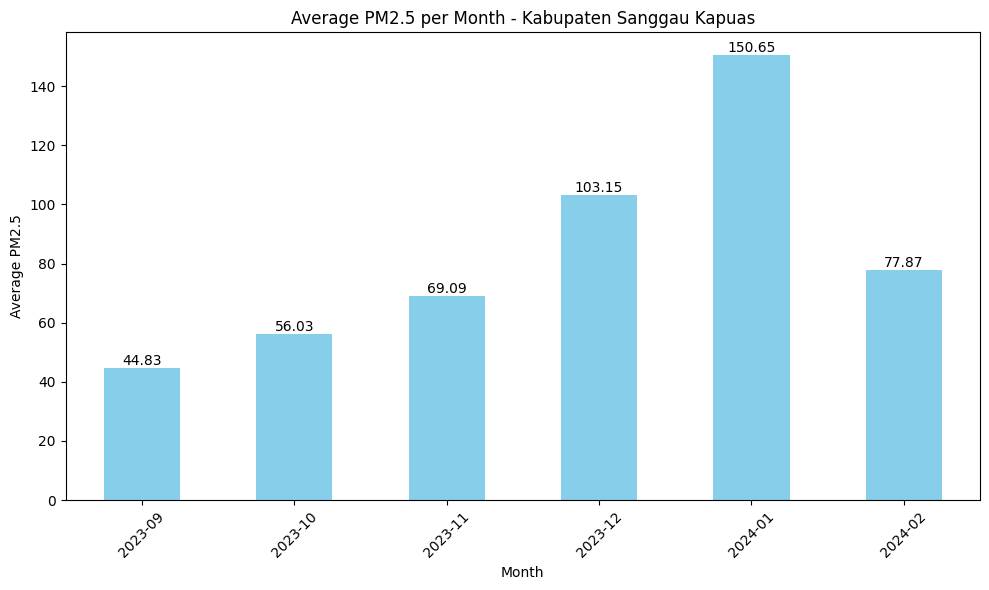

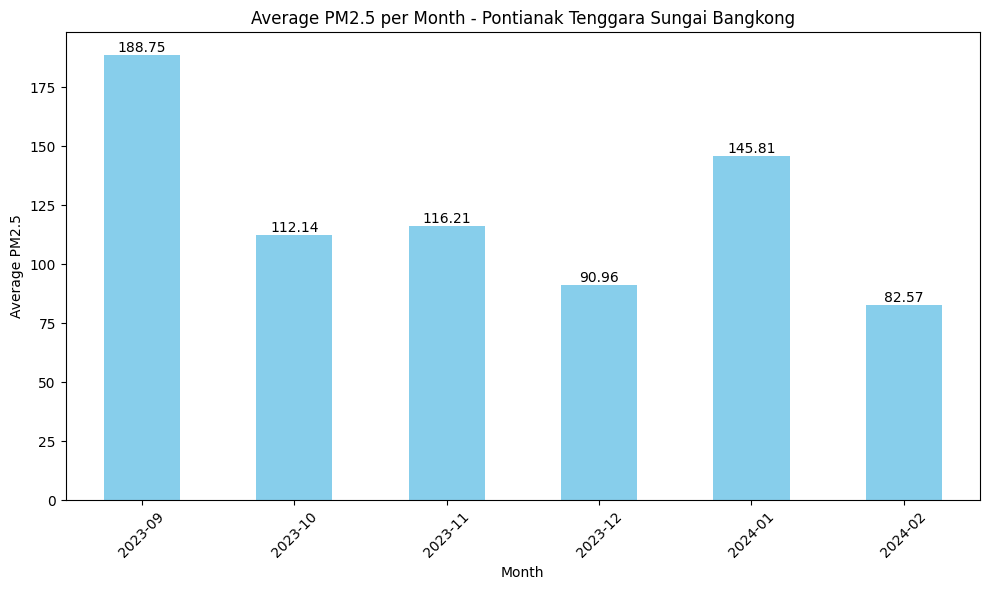

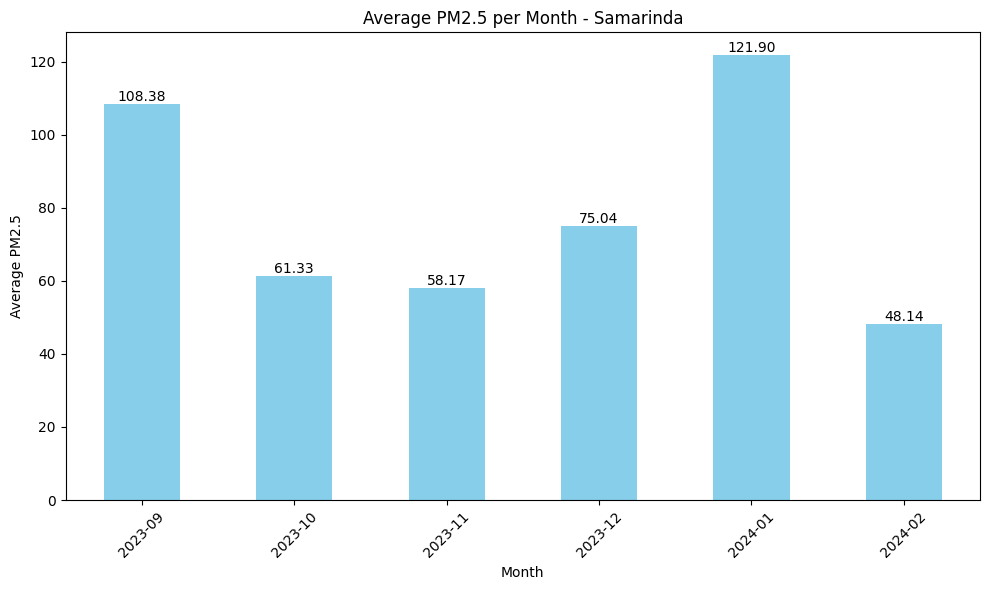

In [10]:
# Create a bar graph for each station
for station in stations:
    # Filter data for the current station
    station_data = data[data['stasiun'] == station]
    
    # Group by month and calculate the average PM2.5
    monthly_avg_pm25 = station_data.groupby('month')['pm 2.5'].mean()
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    bars = monthly_avg_pm25.plot(kind='bar', color='skyblue')
    
    # Set the title and labels
    plt.title(f'Average PM2.5 per Month - {station}')
    plt.xlabel('Month')
    plt.ylabel('Average PM2.5')
    plt.xticks(rotation=45)
    
    # Add the value label on each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.2f'), 
                      xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords="offset points", 
                      ha='center', va='center', fontsize=10, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()